# Standardization (Z-score Normalizaion) 

In [1]:
# sigma > 1 need to squeeze
# sigma ~ 0 need to expand

In [20]:
#Library Import
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('Social_Network_Ads.csv')

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# #iloc = Integer location-based indexing
# [:, 2:] = [rows, columns]
# : (first part) = Select ALL rows
# 2: (second part) = Select columns from index 2 onwards (including index 2)


#selection of require columns
# df=df.iloc[:,2:]

In [16]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train test split 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
sc.fit(X_train)

#Transform train and test sets 
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)


#Learn from train dataset but need tranform both train and test dataset 

In [28]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [30]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [38]:
# This is numpy array need to convert into dataframe
# X_train_scaled

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [41]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

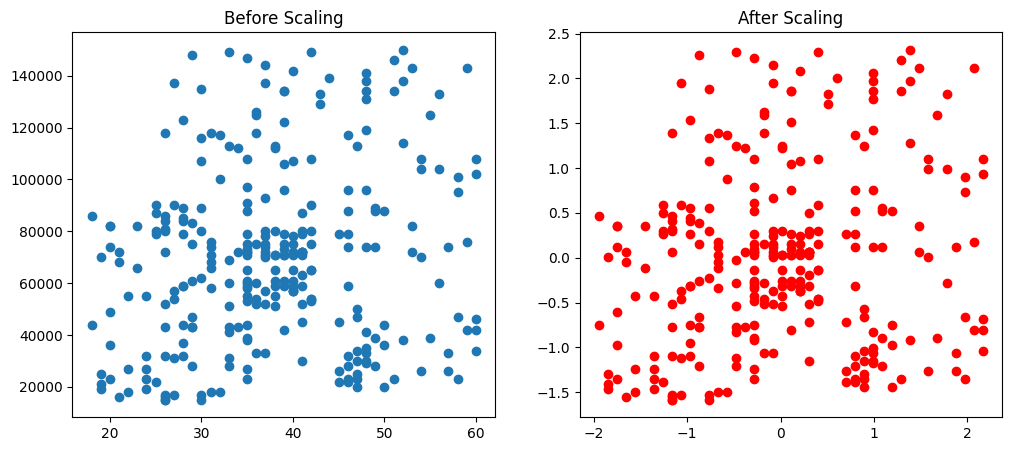

In [42]:
# Through scaling data squeeze and become centered  
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

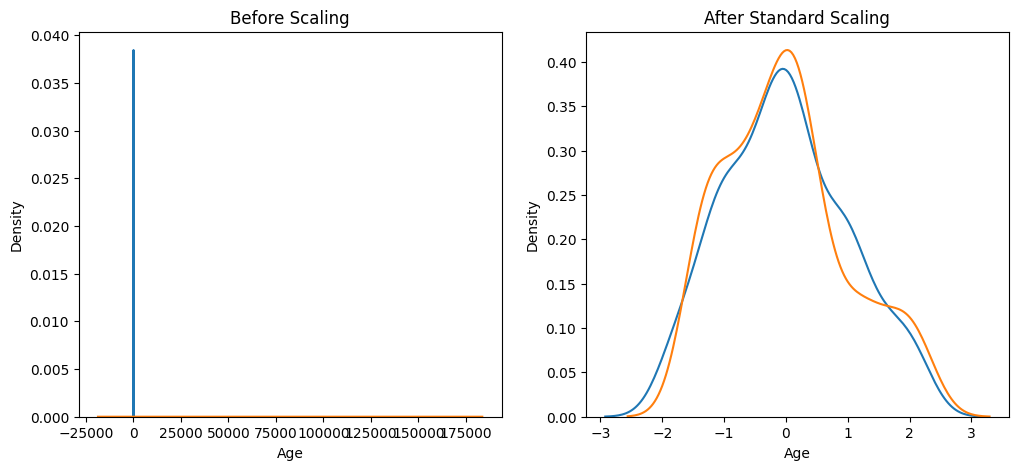

In [44]:
#Through this graph need to scale the both parameter to make them comparable 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributionss

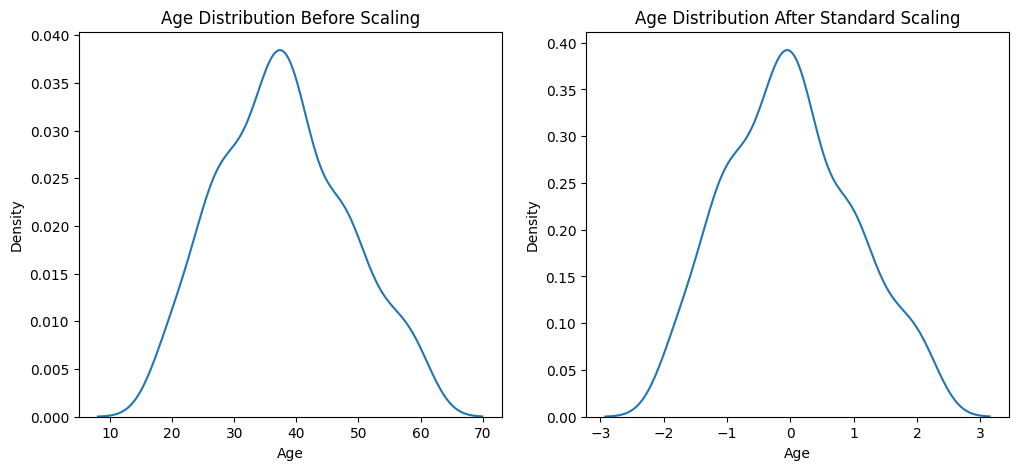

In [45]:
# Scaling both the paramters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()


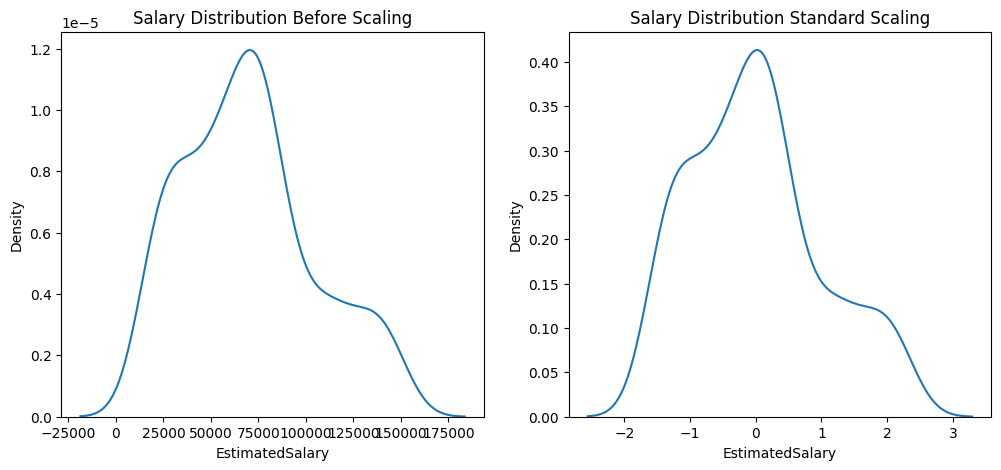

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why scaling is important ?

In [47]:
#Library for linear regression
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [52]:
lr.fit(X_train,y_train) #Training actual data
lr_scaled.fit(X_train_scaled,y_train) #Trained scaled data

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test) #predicting actual data
y_pred_scaled = lr_scaled.predict(X_test_scaled) #predicting scaled data

In [58]:

from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [63]:
dt.fit(X_train,y_train) #Training actual data
dt_scaled.fit(X_train_scaled,y_train) #Trained scaled data

DecisionTreeClassifier()

In [65]:
y_pred = dt.predict(X_test)
y_pred_scaled= dt_scaled.predict(X_test_scaled)

In [66]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [67]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outlier

In [72]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              403 non-null    int64
 1   EstimatedSalary  403 non-null    int64
 2   Purchased        403 non-null    int64
dtypes: int64(3)
memory usage: 9.6 KB


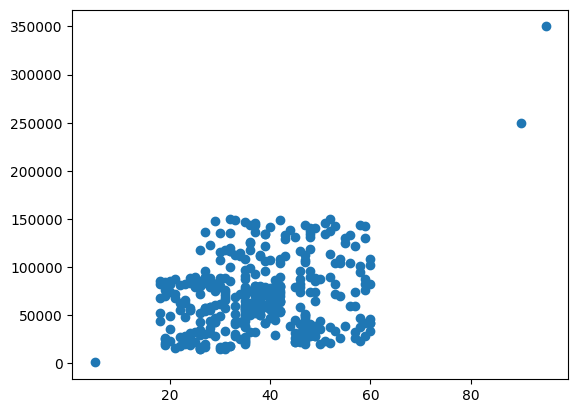

In [74]:
plt.scatter(df['Age'], df['EstimatedSalary'])

## When to use standardization
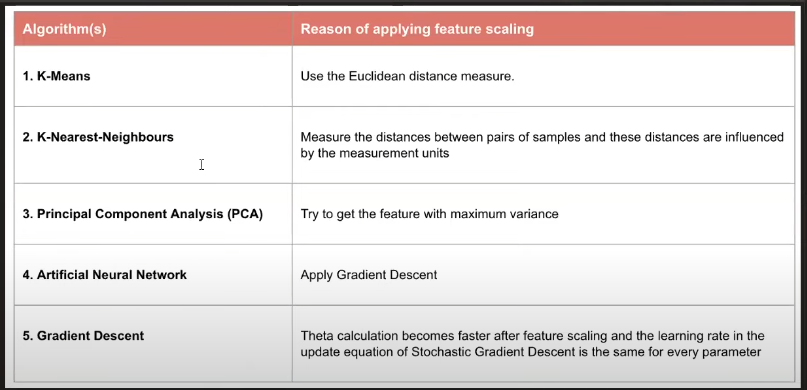